## III -Exploratory Analysis
### C - HVBP Table
#### 1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
print("Imported all the required libraries")

Imported all the required libraries


#### 2) Querying data from the server

In [2]:
sql = '''
SELECT * FROM "HVBP";'''
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "83.212.82.56",
    port = "5432",

    database = "dap_medicare")
    hvbp_df = sqlio.read_sql_query(sql, dbConnection) 
except (Exception, psycopg2.Error) as dbError:
    print ("Error while fetching db hvbp:", dbError)
finally:
    if(dbConnection): dbConnection.close()
hvbp_df.head()

,provider_number,hospital_name,address,city,state,zip_code,county_name,mort_30_ami_achievement_threshold,mort_30_ami_benchmark,mort_30_ami_baseline_rate,...,mort_30_pn_measure_score,comp_hip_knee_achievement_threshold,comp_hip_knee_benchmark,comp_hip_knee_baseline_rate,comp_hip_knee_performance_rate,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score,latitude,longitude
0,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,San Diego,0.853715,0.875869,0.837234,...,9,0.032229,0.023178,0.027022,0.018553,10,9,10,-117.009178,32.779435
1,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,Los Angeles,0.853715,0.875869,0.862837,...,10,0.032229,0.023178,0.034845,0.020537,10,9,10,NaN,NaN
2,50224,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,ONE HOAG DRIVE,NEWPORT BEACH,CA,92663,Orange,0.853715,0.875869,0.856289,...,10,0.032229,0.023178,0.037973,0.026753,7,8,7,NaN,NaN
3,60020,"PARKVIEW MEDICAL CENTER, INC",400 W 16TH ST,PUEBLO,CO,81003,Pueblo,0.853715,0.875869,0.856647,...,8,0.032229,0.023178,0.037675,0.038362,0,0,0,-104.612123,38.281678
4,150169,COMMUNITY HOSPITAL NORTH,7150 CLEARVISTA DR,INDIANAPOLIS,IN,46256,Marion,0.853715,0.875869,0.827037,...,3,0.032229,0.023178,0.032862,0.031087,2,1,2,-86.043072,39.900033


#### 3) Descriptive statistical analysis
i) Shape of the hvbp data frame

In [21]:
print ('data dimensions:', hvbp_df.shape)

data dimensions: (2731, 37)


ii) List the data types for each column

In [9]:
hvbp_df.dtypes


provider_number                          int64
hospital_name                           object
address                                 object
city                                    object
state                                   object
zip_code                                 int64
county_name                             object
mort_30_ami_achievement_threshold      float64
mort_30_ami_benchmark                  float64
mort_30_ami_baseline_rate              float64
mort_30_ami_performance_rate           float64
mort_30_ami_achievement_points           int64
mort_30_ami_improvement_points           int64
mort_30_ami_measure_score                int64
mort_30_hf_achievement_threshold       float64
mort_30_hf_benchmark                   float64
mort_30_hf_baseline_rate               float64
mort_30_hf_performance_rate            float64
mort_30_hf_achievement_points            int64
mort_30_hf_improvement_points            int64
mort_30_hf_measure_score                 int64
mort_30_pn_ac

iii) Summary of all columns

In [15]:
print("All numerical Columns")
hvbp_df.describe()

All numerical Columns


,provider_number,zip_code,mort_30_ami_achievement_threshold,mort_30_ami_benchmark,mort_30_ami_baseline_rate,mort_30_ami_performance_rate,mort_30_ami_achievement_points,mort_30_ami_improvement_points,mort_30_ami_measure_score,mort_30_hf_achievement_threshold,...,mort_30_pn_measure_score,comp_hip_knee_achievement_threshold,comp_hip_knee_benchmark,comp_hip_knee_baseline_rate,comp_hip_knee_performance_rate,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score,latitude,longitude
count,2731.000000,2731.000000,2731.000000,2.731000e+03,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2.731000e+03,...,2731.000000,2731.000000,2.731000e+03,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2584.000000,2584.000000
mean,256912.403149,51608.730502,0.853715,8.758690e-01,0.853883,0.872044,7.246796,6.344196,7.562431,8.810900e-01,...,6.172098,0.032229,2.317800e-02,0.032641,0.025535,6.777005,6.224826,7.112779,-91.930806,37.450753
std,159049.146717,28102.463142,0.000000,2.220853e-16,0.012806,0.009493,2.716633,2.798250,2.398878,1.110426e-16,...,3.095851,0.000000,3.470082e-18,0.006178,0.005260,3.222358,3.141006,2.941509,15.465319,5.184017
min,10001.000000,1040.000000,0.853715,8.758690e-01,0.799266,0.831566,0.000000,0.000000,0.000000,8.810900e-01,...,0.000000,0.032229,2.317800e-02,0.015816,0.012587,0.000000,0.000000,0.000000,-159.366198,19.519237
25%,110026.000000,30068.000000,0.853715,8.758690e-01,0.845970,0.866936,6.000000,5.000000,6.000000,8.810900e-01,...,4.000000,0.032229,2.317800e-02,0.028372,0.022319,5.000000,5.000000,6.000000,-97.512445,33.791066
50%,250050.000000,48201.000000,0.853715,8.758690e-01,0.854780,0.872083,8.000000,7.000000,8.000000,8.810900e-01,...,7.000000,0.032229,2.317800e-02,0.031803,0.025042,8.000000,7.000000,8.000000,-87.683200,37.973732
75%,390065.500000,76190.500000,0.853715,8.758690e-01,0.862395,0.877423,10.000000,9.000000,10.000000,8.810900e-01,...,9.000000,0.032229,2.317800e-02,0.035979,0.027884,10.000000,9.000000,10.000000,-81.192737,41.294664
max,670122.000000,99801.000000,0.853715,8.758690e-01,0.907917,0.911739,10.000000,9.000000,10.000000,8.810900e-01,...,10.000000,0.032229,2.317800e-02,0.064550,0.107465,10.000000,9.000000,10.000000,-68.009639,64.831407


In [16]:
print("All categorical Columns")
hvbp_df.describe(include=['object'])

All categorical Columns


,hospital_name,address,city,state,county_name
count,2731,2731,2731,2731,2731
unique,2644,2724,1716,50,944
top,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,CA,Los Angeles
freq,7,3,22,269,71


iv) Summary of columns containg improvement and achievement points and measures for diffferent features

In [3]:
print("Creating a new data frame contaning only improvement and achievement points and measures")
features = ['mort_30_ami_achievement_points','mort_30_ami_improvement_points','mort_30_ami_measure_score',
            'mort_30_hf_achievement_points','mort_30_hf_improvement_points','mort_30_hf_measure_score',
            'mort_30_pn_achievement_points','mort_30_pn_improvement_points','mort_30_pn_measure_score',
            'comp_hip_knee_achievement_points','comp_hip_knee_improvement_points','comp_hip_knee_measure_score']
hvbp_df_m = hvbp_df[features]
hvbp_df_m.head()

Creating a new data frame contaning only improvement and achievement points and measures


,mort_30_ami_achievement_points,mort_30_ami_improvement_points,mort_30_ami_measure_score,mort_30_hf_achievement_points,mort_30_hf_improvement_points,mort_30_hf_measure_score,mort_30_pn_achievement_points,mort_30_pn_improvement_points,mort_30_pn_measure_score,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score
0,8,8,8,10,9,10,9,9,9,10,9,10
1,10,9,10,9,0,9,10,9,10,10,9,10
2,10,9,10,10,9,10,10,9,10,7,8,7
3,1,0,1,2,5,5,8,4,8,0,0,0
4,1,5,5,0,3,3,3,0,3,2,1,2


In [14]:
print("Summary of hvbp_df_m")
hvbp_df_m.describe()

Summary of hvbp_df_m


,mort_30_ami_achievement_points,mort_30_ami_improvement_points,mort_30_ami_measure_score,mort_30_hf_achievement_points,mort_30_hf_improvement_points,mort_30_hf_measure_score,mort_30_pn_achievement_points,mort_30_pn_improvement_points,mort_30_pn_measure_score,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score
count,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,7.246796,6.344196,7.562431,2.930795,2.448187,3.406445,5.623947,5.055291,6.172098,6.777005,6.224826,7.112779
std,2.716633,2.798250,2.398878,3.325554,3.005698,3.245106,3.458005,3.369474,3.095851,3.222358,3.141006,2.941509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,6.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,5.000000,5.000000,6.000000
50%,8.000000,7.000000,8.000000,2.000000,1.000000,3.000000,6.000000,6.000000,7.000000,8.000000,7.000000,8.000000
75%,10.000000,9.000000,10.000000,5.000000,4.000000,6.000000,9.000000,9.000000,9.000000,10.000000,9.000000,10.000000
max,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000


v) Finding correlations between columns of new data frame hvbp_df_m

In [17]:
hvbp_df_m.corr()

,mort_30_ami_achievement_points,mort_30_ami_improvement_points,mort_30_ami_measure_score,mort_30_hf_achievement_points,mort_30_hf_improvement_points,mort_30_hf_measure_score,mort_30_pn_achievement_points,mort_30_pn_improvement_points,mort_30_pn_measure_score,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score
mort_30_ami_achievement_points,1.000000,0.729198,0.961827,0.269897,0.172574,0.246065,0.192212,0.079623,0.159886,0.013319,0.014358,0.010909
mort_30_ami_improvement_points,0.729198,1.000000,0.800484,0.135017,0.124763,0.129687,0.073268,0.052526,0.065760,-0.003184,-0.010975,-0.007610
mort_30_ami_measure_score,0.961827,0.800484,1.000000,0.247915,0.171589,0.231164,0.181338,0.090004,0.157915,0.016231,0.019138,0.014108
mort_30_hf_achievement_points,0.269897,0.135017,0.247915,1.000000,0.741414,0.951845,0.351016,0.198376,0.316209,-0.022223,-0.013273,-0.019273
mort_30_hf_improvement_points,0.172574,0.124763,0.171589,0.741414,1.000000,0.832830,0.207236,0.183928,0.212507,-0.020311,-0.013083,-0.019350
mort_30_hf_measure_score,0.246065,0.129687,0.231164,0.951845,0.832830,1.000000,0.314883,0.203802,0.299198,-0.023171,-0.010585,-0.019731
mort_30_pn_achievement_points,0.192212,0.073268,0.181338,0.351016,0.207236,0.314883,1.000000,0.749183,0.946924,0.032248,0.028089,0.033953
mort_30_pn_improvement_points,0.079623,0.052526,0.090004,0.198376,0.183928,0.203802,0.749183,1.000000,0.841572,0.021310,0.030009,0.024095
mort_30_pn_measure_score,0.159886,0.065760,0.157915,0.316209,0.212507,0.299198,0.946924,0.841572,1.000000,0.028927,0.025854,0.028800
comp_hip_knee_achievement_points,0.013319,-0.003184,0.016231,-0.022223,-0.020311,-0.023171,0.032248,0.021310,0.028927,1.000000,0.803644,0.962635


#### 4) Visualization
i) Checking distribution of points and measures using box-plot

[Text(0, 0, 'mort_30_ami_achievement_points'),
 Text(0, 0, 'mort_30_ami_improvement_points'),
 Text(0, 0, 'mort_30_ami_measure_score'),
 Text(0, 0, 'mort_30_hf_achievement_points'),
 Text(0, 0, 'mort_30_hf_improvement_points'),
 Text(0, 0, 'mort_30_hf_measure_score'),
 Text(0, 0, 'mort_30_pn_achievement_points'),
 Text(0, 0, 'mort_30_pn_improvement_points'),
 Text(0, 0, 'mort_30_pn_measure_score'),
 Text(0, 0, 'comp_hip_knee_achievement_points'),
 Text(0, 0, 'comp_hip_knee_improvement_points'),
 Text(0, 0, 'comp_hip_knee_measure_score')]

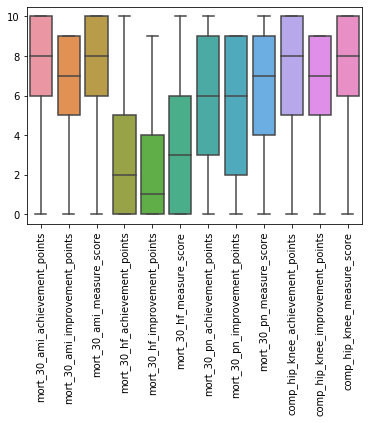

In [4]:
box_plot = sns.boxplot(data=hvbp_df_m)
box_plot.set_xticklabels(box_plot.get_xticklabels(),rotation=90)

ii) Creating histogram to check the number of hospital having 0 to 10 points / measures


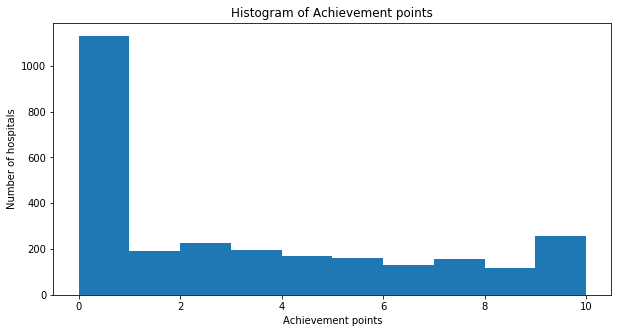

In [7]:
# 'bin_edges' is a list of bin intervals

hvbp_df_m['mort_30_hf_achievement_points'].plot(kind='hist', figsize=(10, 5))

plt.title('Histogram of Achievement points') # add a title to the histogram
plt.ylabel('Number of hospitals') # add y-label
plt.xlabel('Achievement points') # add x-label

plt.show()


In [10]:
fig = plt.hist(hvbp_df_m, x="mort_30_hf_achievement_points",
                   title='Histogram of Achievement points',
                   labels={'mort_30_hf_achievement_points':'mort_30_hf_achievement_points'}, # can specify one label per df column
                   opacity=0.8, # represent bars with log scale
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )
fig.show()


TypeError: hist() got multiple values for argument 'x'